In [141]:
training_sample = list()

try:
    with open("output/training_text/ontunemanager_recu2.txt", 'r', encoding='UTF8') as f:
        training_sample = f.readlines()
except:
    raise Exception("source file is not exist")


from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(training_sample)


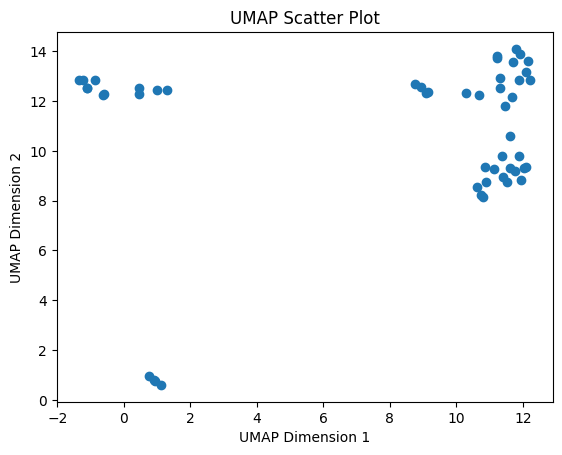

In [69]:
plt.scatter(X_umap[:, 0], X_umap[:, 1])
plt.title('UMAP Scatter Plot')
plt.xlabel('UMAP Dimension 1')
plt.ylabel('UMAP Dimension 2')
plt.show()

In [142]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# 그리드 탐색에 사용할 `eps`와 `min_samples` 값의 후보
eps_candidates = [0.2, 0.3, 0.4, 0.5]
min_samples_candidates = [1,2]

best_score = -1
best_eps = None
best_min_samples = None

# 그리드 탐색 실행
for eps, min_samples in product(eps_candidates, min_samples_candidates):
    # DBSCAN 알고리즘을 실행하여 클러스터링 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
    dbscan.fit(tfidf_matrix.toarray())

    # 클러스터링 결과의 평가 지표인 실루엣 점수 계산
    labels = dbscan.labels_
    print(labels)
    score = silhouette_score(tfidf_matrix.toarray(), labels)
    print(f"Silhouette Score: {score} {eps} {min_samples}")

    # 현재 조합의 평가 지표를 확인하여 최적값 업데이트
    if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_samples

# 최적 조합과 평가 지표 출력
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

# 최적 조합으로 DBSCAN 알고리즘 실행하여 최종 클러스터링 수행
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric="cosine")
dbscan.fit(tfidf_matrix.toarray())

# 최종 클러스터링 결과 확인
labels = dbscan.labels_


[  0   1   2 ... 892   4 892]
Silhouette Score: 0.048893085408039556 0.2 1
[-1 -1 -1 ... 35  0 35]
Silhouette Score: -0.1331583037601221 0.2 2
[  0   1   1 ... 764   3 764]
Silhouette Score: 0.0975991507433509 0.3 1
[-1  0  0 ... 33  1 33]
Silhouette Score: 0.019250376802754883 0.3 2
[  0   1   1 ... 179   2 179]
Silhouette Score: -0.11067250483808609 0.4 1
[0 1 1 ... 9 2 9]
Silhouette Score: 0.07097920593053691 0.4 2
[ 0  1  1 ... 10  2 10]
Silhouette Score: 0.012558268135706256 0.5 1
[0 1 1 ... 6 2 6]
Silhouette Score: 0.0593022255120885 0.5 2
Best eps: 0.3
Best min_samples: 1
Best silhouette score: 0.0975991507433509


In [143]:
from sklearn.cluster import DBSCAN
import numpy as np

def exec_dbscan(eps, min_samples, metric):
    #scaler = StandardScaler()
    #scaled_log_data = scaler.fit_transform(tfidf_matrix.toarray())
    scaled_log_data = np.array(tfidf_matrix.toarray())

    # DBSCAN 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = dbscan.fit_predict(scaled_log_data)

    # 클러스터링 결과 출력
    for i, cluster in enumerate(clusters):
        print(f"Data point {i+1} is assigned to cluster {cluster}")
        
    return clusters

clusters=exec_dbscan(0.3, 1, "cosine")

for i in range(clusters.max()):
    cluster_counts = len([j for j in range(len(training_sample)) if clusters[j] == i])
    print(f"Cluster {i+1}: {cluster_counts}")
    



Data point 1 is assigned to cluster 0
Data point 2 is assigned to cluster 1
Data point 3 is assigned to cluster 1
Data point 4 is assigned to cluster 2
Data point 5 is assigned to cluster 3
Data point 6 is assigned to cluster 4
Data point 7 is assigned to cluster 5
Data point 8 is assigned to cluster 3
Data point 9 is assigned to cluster 3
Data point 10 is assigned to cluster 3
Data point 11 is assigned to cluster 3
Data point 12 is assigned to cluster 3
Data point 13 is assigned to cluster 3
Data point 14 is assigned to cluster 3
Data point 15 is assigned to cluster 3
Data point 16 is assigned to cluster 3
Data point 17 is assigned to cluster 3
Data point 18 is assigned to cluster 3
Data point 19 is assigned to cluster 3
Data point 20 is assigned to cluster 6
Data point 21 is assigned to cluster 3
Data point 22 is assigned to cluster 3
Data point 23 is assigned to cluster 7
Data point 24 is assigned to cluster 8
Data point 25 is assigned to cluster 9
Data point 26 is assigned to clust

Cluster 642: 1
Cluster 643: 1
Cluster 644: 1
Cluster 645: 1
Cluster 646: 1
Cluster 647: 1
Cluster 648: 1
Cluster 649: 1
Cluster 650: 1
Cluster 651: 1
Cluster 652: 1
Cluster 653: 1
Cluster 654: 1
Cluster 655: 1
Cluster 656: 1
Cluster 657: 1
Cluster 658: 1
Cluster 659: 1
Cluster 660: 1
Cluster 661: 1
Cluster 662: 1
Cluster 663: 1
Cluster 664: 1
Cluster 665: 1
Cluster 666: 1
Cluster 667: 1
Cluster 668: 1
Cluster 669: 1
Cluster 670: 1
Cluster 671: 1
Cluster 672: 1
Cluster 673: 1
Cluster 674: 1
Cluster 675: 1
Cluster 676: 1
Cluster 677: 1
Cluster 678: 1
Cluster 679: 1
Cluster 680: 1
Cluster 681: 1
Cluster 682: 1
Cluster 683: 1
Cluster 684: 1
Cluster 685: 1
Cluster 686: 1
Cluster 687: 1
Cluster 688: 1
Cluster 689: 1
Cluster 690: 1
Cluster 691: 1
Cluster 692: 1
Cluster 693: 1
Cluster 694: 1
Cluster 695: 1
Cluster 696: 1
Cluster 697: 1
Cluster 698: 1
Cluster 699: 1
Cluster 700: 1
Cluster 701: 1
Cluster 702: 1
Cluster 703: 1
Cluster 704: 1
Cluster 705: 1
Cluster 706: 1
Cluster 707: 1
Cluster 70

In [144]:
print(f"Cluster Count: {clusters.max()}")
print(f"Invalid Cluster Count: {len([training_sample[j] for j in range(len(training_sample)) if clusters[j] == -1])}")
print()
print(clusters)
print(len(clusters))

# 클러스터링 결과 확인
for i in range(clusters.max()):
    cluster_logs = [training_sample[j] for j in range(len(training_sample)) if clusters[j] == i]
    print(f"Cluster {i+1}:")
    print(cluster_logs)
    print()

Cluster Count: 1473
Invalid Cluster Count: 0

[  0   1   1 ... 764   3 764]
2450
Cluster 1:
['Drop tables Start\n']

Cluster 2:
['[Delay] OnTuneMainThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>\n', '[Delay] OnTuneDBThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>\n']

Cluster 3:
['Drop tables End\n']

Cluster 4:
['jjwreo1a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>)\n', 'pbaksv2a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<:NUM:>)\n', 'JEJUDB: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<:NUM:>)\n', 'jjrintla: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<:NUM:>)\n', 'fileserver: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<:NUM:>, idle:<:NUM:>, stolen:<:NUM:>)\n', 'jjlint1a: CPU total value is invalid.user:<:NUM:>, sys:<:NUM:>, wait:<

Cluster 622:
['[DF] pmbidd1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 623:
['[DF] jjebtsap1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 624:
['[DF] jjlamlts1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 625:
['[DF] jjquts1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 626:
['[DF] jjlint1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 627:
['[DF] jjlext1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 628:
['[DF] jjbpap2a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 629:
['[DF] pfdsap2s : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 630:
['[DF] tapiwe1a : reconnected with delayed df response. DFReCheckInterval(<:NUM:> sec)\n']

Cluster 631:
['[DF] pmobdb2a : reconnected with del

Cluster 1294:
["---Specific Words--- Insert Query1 error (insert into procargid-<:DATETIME:> values(<:NUM:>,'postgres: dcs dcsdb <:IP:>(<:NUM:>) idle'))\n", "---Specific Words--- Insert Query1 error (insert into procargid-<:DATETIME:> values(<:NUM:>,'postgres: clmadm clm22 <:IP:>(<:NUM:>) idle'))\n"]

Cluster 1295:
["---Specific Words--- Insert Query1 error (insert into procargid-<:DATETIME:> values(<:NUM:>,'sshd: seluser1@pts/<:NUM:>'))\n"]

Cluster 1296:
["---Specific Words--- Insert Query1 error (insert into procargid-<:DATETIME:> values(<:NUM:>,'TMS ORA102 -g <:NUM:> -i <:NUM:> -u apsvr02 -U /run/jera/tuxadm/log/ULOG -m <:NUM:> -A'))\n", "---Specific Words--- Socket Error Code: <:NUM:>($<:NUM:>): insert into procargid-<:DATETIME:> values(<:NUM:>,'TMS ORA102 -g <:NUM:> -i <:NUM:> -u apsvr02 -U /run/jera/tuxadm/log/ULOG -m <:NUM:> -A')\n"]

Cluster 1297:
['---Specific Words--- Insert Query1 error (insert into procargid-<:DATETIME:> values(<:NUM:>,\'"C:\\Program Files\\AhnLab\\V3NET90

In [145]:
import umap
from sklearn.datasets import load_digits
from sklearn.metrics import silhouette_score
from itertools import product


X=tfidf_matrix.toarray()

# 그리드 탐색에 사용할 `n_neighbors`와 `min_dist` 값의 후보
n_neighbors_candidates = [5, 10, 15]
min_dist_candidates = [0.1, 0.5, 1.0]

best_score = -1
best_n_neighbors = None
best_min_dist = None

# 그리드 탐색 실행
for n_neighbors, min_dist in product(n_neighbors_candidates, min_dist_candidates):
    # UMAP 알고리즘을 실행하여 차원 축소 수행
    umap_embedding = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist, metric='cosine', n_components=2).fit_transform(X)

    # 차원 축소 결과의 평가 지표인 실루엣 점수 계산
    score = silhouette_score(X, clusters)
    print(f"Silhouette Score: {score} {n_neighbors} {min_dist}")

    # 현재 조합의 평가 지표를 확인하여 최적값 업데이트
    if score > best_score:
        best_score = score
        best_n_neighbors = n_neighbors
        best_min_dist = min_dist

# 최적 조합과 평가 지표 출력
print("Best n_neighbors:", best_n_neighbors)
print("Best min_dist:", best_min_dist)
print("Best silhouette score:", best_score)

# 최적 조합으로 UMAP 알고리즘 실행하여 최종 차원 축소 수행
umap_embedding = umap.UMAP(n_neighbors=best_n_neighbors, min_dist=best_min_dist, metric='cosine', n_components=2).fit_transform(X)


Silhouette Score: 0.0975991507433509 5 0.1
Silhouette Score: 0.0975991507433509 5 0.5
Silhouette Score: 0.0975991507433509 5 1.0
Silhouette Score: 0.0975991507433509 10 0.1
Silhouette Score: 0.0975991507433509 10 0.5
Silhouette Score: 0.0975991507433509 10 1.0
Silhouette Score: 0.0975991507433509 15 0.1
Silhouette Score: 0.0975991507433509 15 0.5
Silhouette Score: 0.0975991507433509 15 1.0
Best n_neighbors: 5
Best min_dist: 0.1
Best silhouette score: 0.0975991507433509


In [130]:
umap_model = umap.UMAP(n_components=2, metric='cosine')  # 2차원으로 축소
X_umap = umap_model.fit_transform(tfidf_matrix.toarray())  # 데이터 X를 UMAP에 적용하여 2차원으로 변환

from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from itertools import product

# 그리드 탐색에 사용할 `eps`와 `min_samples` 값의 후보
eps_candidates = [0.1, 0.2, 0.3]
min_samples_candidates = [1,2]

best_score = -1
best_eps = None
best_min_samples = None

# 그리드 탐색 실행
for eps, min_samples in product(eps_candidates, min_samples_candidates):
    # DBSCAN 알고리즘을 실행하여 클러스터링 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric="cosine")
    dbscan.fit(X_umap)

    # 클러스터링 결과의 평가 지표인 실루엣 점수 계산
    labels = dbscan.labels_
    print(labels)
    score = silhouette_score(X_umap, labels)
    print(f"Silhouette Score: {score} {eps} {min_samples}")

    # 현재 조합의 평가 지표를 확인하여 최적값 업데이트
    if score > best_score:
        best_score = score
        best_eps = eps
        best_min_samples = min_samples

# 최적 조합과 평가 지표 출력
print("Best eps:", best_eps)
print("Best min_samples:", best_min_samples)
print("Best silhouette score:", best_score)

# 최적 조합으로 DBSCAN 알고리즘 실행하여 최종 클러스터링 수행
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples, metric="cosine")
dbscan.fit(X_umap)

# 최종 클러스터링 결과 확인
labels = dbscan.labels_


[0 1 1 ... 0 1 0]
Silhouette Score: 0.592052698135376 0.1 1
[0 1 1 ... 0 1 0]
Silhouette Score: 0.592052698135376 0.1 2
[0 1 1 ... 0 1 0]
Silhouette Score: 0.592052698135376 0.2 1
[0 1 1 ... 0 1 0]
Silhouette Score: 0.592052698135376 0.2 2
[0 0 0 ... 0 0 0]
Silhouette Score: 0.4046819508075714 0.3 1
[0 0 0 ... 0 0 0]
Silhouette Score: 0.4046819508075714 0.3 2
Best eps: 0.1
Best min_samples: 1
Best silhouette score: 0.5920527


In [140]:


def exec_dbscan2(eps, min_samples, metric):
    #scaler = StandardScaler()
    #scaled_log_data = scaler.fit_transform(tfidf_matrix.toarray())
    scaled_log_data = np.array(X_umap)

    # DBSCAN 수행
    dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric=metric)
    clusters = dbscan.fit_predict(scaled_log_data)

    # 클러스터링 결과 출력
    for i, cluster in enumerate(clusters):
        print(f"Data point {i+1} is assigned to cluster {cluster}")
        
    return clusters

clusters=exec_dbscan2(0.1, 1, "cosine")

print(clusters)
for i, cluster in enumerate(clusters):
    print(i, cluster)
    if cluster > 1 :
        print(i, cluster)
        print([training_sample[j] for j in range(len(training_sample)) if clusters[j] == cluster])

Data point 1 is assigned to cluster 0
Data point 2 is assigned to cluster 1
Data point 3 is assigned to cluster 1
Data point 4 is assigned to cluster 0
Data point 5 is assigned to cluster 2
Data point 6 is assigned to cluster 0
Data point 7 is assigned to cluster 0
Data point 8 is assigned to cluster 1
Data point 9 is assigned to cluster 1
Data point 10 is assigned to cluster 1
Data point 11 is assigned to cluster 1
Data point 12 is assigned to cluster 1
Data point 13 is assigned to cluster 1
Data point 14 is assigned to cluster 1
Data point 15 is assigned to cluster 2
Data point 16 is assigned to cluster 1
Data point 17 is assigned to cluster 1
Data point 18 is assigned to cluster 1
Data point 19 is assigned to cluster 2
Data point 20 is assigned to cluster 0
Data point 21 is assigned to cluster 1
Data point 22 is assigned to cluster 1
Data point 23 is assigned to cluster 0
Data point 24 is assigned to cluster 0
Data point 25 is assigned to cluster 0
Data point 26 is assigned to clust

[  0   1   1 ... 764   3 764]
2450
1474


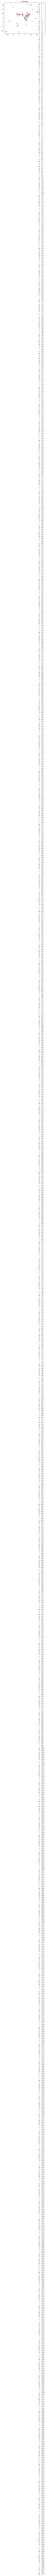

In [146]:
    
import umap
import matplotlib.pyplot as plt

umap_model = umap.UMAP(n_components=2, n_neighbors=5, min_dist=0.1, metric='cosine')  # 2차원으로 축소
X_umap = umap_model.fit_transform(tfidf_matrix.toarray())  # 데이터 X를 UMAP에 적용하여 2차원으로 변환

import seaborn as sns

palette = sns.color_palette('bright', len(set(clusters)))

sns.scatterplot(x=X_umap[:,0], y=X_umap[:, 1], hue=clusters, legend='full', palette=palette)
plt.title('Clustered')

print(clusters)
print(len(clusters))
print(len(set(clusters)))

In [158]:
print(X_umap)
for idx, x in enumerate(X_umap):
    if x[0] > 5 and x[1] < -3:
        print(idx+1, x, training_sample[idx])

[[ 13.940324    4.489626 ]
 [  6.005179   -3.2980514]
 [  6.00538    -3.2974923]
 ...
 [ 10.30379    20.066494 ]
 [-10.87031   -10.922918 ]
 [ 10.317313   20.039663 ]]
2 [ 6.005179  -3.2980514] [Delay] OnTuneMainThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>

3 [ 6.00538   -3.2974923] [Delay] OnTuneDBThread SecTimer Interval is delayed.(<:NUM:> sec), AgentLogBufferCount: <:NUM:>

1196 [ 5.975681  -3.3474152] ---Specific Words--- Socket Error Code: <:NUM:>($<:NUM:>): update ontuneinfo set majorversion = <:NUM:>, minorversion = <:NUM:>, releaseversion = <:NUM:>, build = <:NUM:>, time = <:NUM:>, processedpacket = <:NUM:>, processedpackettime = <:NUM:>, newdata = <:NUM:>, inserteddata = <:NUM:>, queueddata = <:NUM:>, eventqueue = <:NUM:>, standardbias = <:NUM:>, daylight = <:NUM:>, daylightbias = <:NUM:>, tablemode = <:NUM:>, bias = <:NUM:>, daylightstarttime = <:NUM:>, standardstarttime = <:NUM:> where id = <:NUM:>

1212 [ 6.0047045 -3.314112 ] onTune v4.<